In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [5]:
# 1. Data Load & Quick Look

df = pd.read_csv('/content/WineQT.csv')

print(df.head())
print(df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
# 2. Feature Selection (chemical qualities)
#    — we’ll use a broad set, but density & acidity are included
# -------------------------------------------------------------------
feature_cols = [
    "fixed acidity", "volatile acidity", "citric acid",
    "residual sugar", "chlorides", "free sulfur dioxide",
    "total sulfur dioxide", "density", "pH",
    "sulphates", "alcohol"
]
X = df[feature_cols]
y = df["quality"]                   # target variable (classification)

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# 3. Helper to build a pipeline, train, and evaluate

def run_model(name, model):
    pipe = Pipeline([
        ("scale", StandardScaler()),
        ("clf",   model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"\n{name} Results")
    print("-" * 40)
    print("Accuracy :", accuracy_score(y_test, y_pred),3)
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion‑matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f"{name} – Confusion Matrix")
    plt.ylabel("Actual"); plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()


Random Forest Results
----------------------------------------
Accuracy : 0.7117903930131004 3
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000         7
           5      0.735     0.856     0.790        97
           6      0.680     0.717     0.698        92
           7      0.737     0.483     0.583        29
           8      0.000     0.000     0.000         3

    accuracy                          0.712       229
   macro avg      0.359     0.343     0.345       229
weighted avg      0.678     0.712     0.689       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


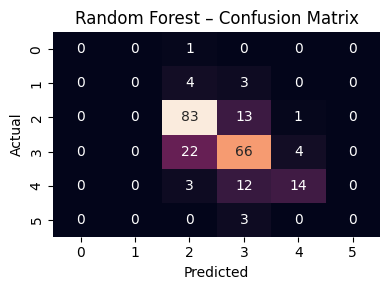


Stochastic Gradient Descent Results
----------------------------------------
Accuracy : 0.5676855895196506 3
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000         7
           5      0.689     0.753     0.719        97
           6      0.557     0.424     0.481        92
           7      0.353     0.621     0.450        29
           8      0.000     0.000     0.000         3

    accuracy                          0.568       229
   macro avg      0.266     0.300     0.275       229
weighted avg      0.560     0.568     0.555       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


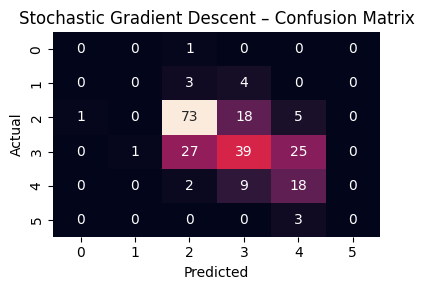


Support Vector Classifier Results
----------------------------------------
Accuracy : 0.6419213973799127 3
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000         7
           5      0.696     0.732     0.714        97
           6      0.594     0.685     0.636        92
           7      0.619     0.448     0.520        29
           8      0.000     0.000     0.000         3

    accuracy                          0.642       229
   macro avg      0.318     0.311     0.312       229
weighted avg      0.612     0.642     0.624       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


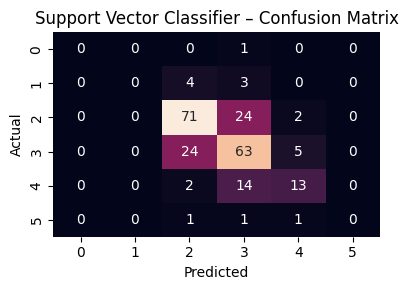

In [10]:
# 4. Train & evaluate each classifier

run_model("Random Forest",
          RandomForestClassifier(n_estimators=300, random_state=42))

run_model("Stochastic Gradient Descent",
          SGDClassifier(loss="log_loss", max_iter=1000, random_state=42))

run_model("Support Vector Classifier",
          SVC(kernel="rbf", C=10, gamma="scale", random_state=42))

<ipython-input-11-3101892599>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


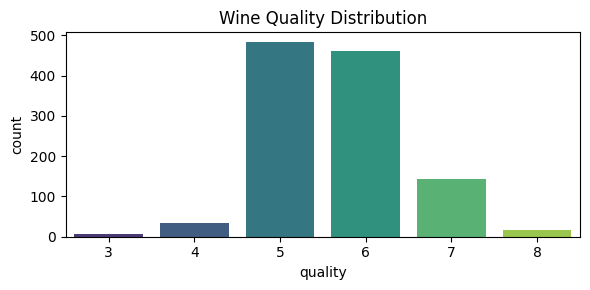

<ipython-input-11-3101892599>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="density", data=df, palette="rocket")


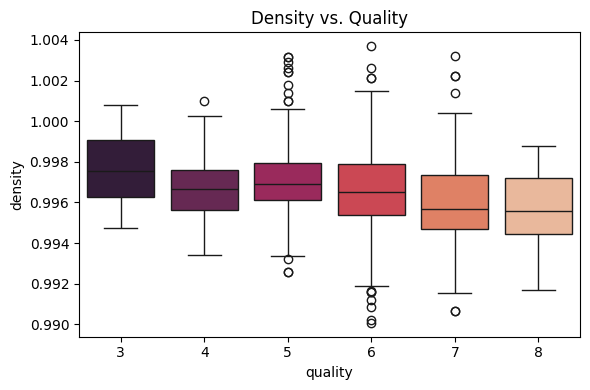

<ipython-input-11-3101892599>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="fixed acidity", data=df, palette="rocket")


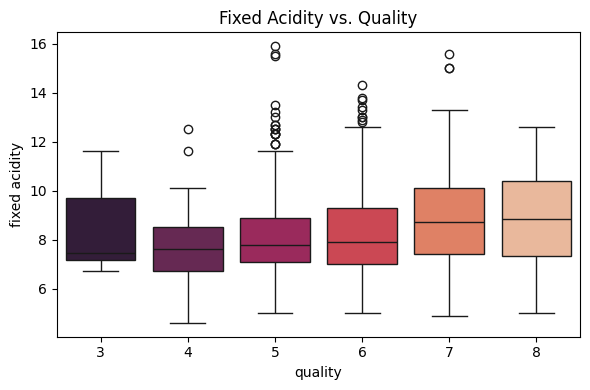

In [11]:
# 5. Data Visualisation
# Distribution of wine quality scores
plt.figure(figsize=(6,3))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Wine Quality Distribution")
plt.tight_layout()
plt.show()

# Scatter: density vs. quality
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="density", data=df, palette="rocket")
plt.title("Density vs. Quality")
plt.tight_layout()
plt.show()

# Scatter: fixed acidity vs. quality
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="fixed acidity", data=df, palette="rocket")
plt.title("Fixed Acidity vs. Quality")
plt.tight_layout()
plt.show()